# Week 2: https://www.coursera.org/learn/natural-language-processing-tensorflow/home/week/1

In [1]:
import json
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

## Loading data and setup config params

In [22]:
vocab_size = int(1e+4)
embed_dim = 16
max_length = 32
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'
training_size = int(2e+3) # 27k records in full data set; we only have 7k records

In [8]:
tmp = []
for f in open ('../Data/sarcasm.json', 'r'):
    tmp.append(json.loads(f))

In [15]:
sentences = []
labels = []

for item in tmp:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Building the classifier

In [24]:
train_sentences = sentences[0:training_size]
train_labels = labels[0:training_size]

test_sentences = sentences[training_size:]
test_labels = labels[training_size:]

In [71]:
assert len(sentences) == len(train_sentences) + len(test_sentences),f'mismatch'

In [55]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [56]:
word_index = tokenizer.word_index

In [57]:
train_seq = tokenizer.texts_to_sequences(train_sentences)
training_pad = pad_sequences(train_seq,
                             maxlen=max_length,
                             padding=padding_type,
                             truncating=trunc_type
                            )

test_seq = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq, 
                         maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type
                        )

In [70]:
## Model

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embed_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [73]:
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']

In [74]:
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


list

In [87]:
num_epochs =30
import numpy as np
history = model.fit(x=training_pad,y=np.array(train_labels), epochs=num_epochs, validation_data=(test_pad, np.array(test_labels)), verbose=2)

Train on 2000 samples, validate on 5082 samples
Epoch 1/30
2000/2000 - 1s - loss: 0.6922 - accuracy: 0.5180 - val_loss: 0.6906 - val_accuracy: 0.5419
Epoch 2/30
2000/2000 - 0s - loss: 0.6843 - accuracy: 0.7620 - val_loss: 0.6821 - val_accuracy: 0.7227
Epoch 3/30
2000/2000 - 0s - loss: 0.6574 - accuracy: 0.8510 - val_loss: 0.6580 - val_accuracy: 0.7595
Epoch 4/30
2000/2000 - 0s - loss: 0.5941 - accuracy: 0.8645 - val_loss: 0.6159 - val_accuracy: 0.7302
Epoch 5/30
2000/2000 - 0s - loss: 0.4939 - accuracy: 0.9185 - val_loss: 0.5589 - val_accuracy: 0.7749
Epoch 6/30
2000/2000 - 0s - loss: 0.3821 - accuracy: 0.9470 - val_loss: 0.5122 - val_accuracy: 0.7767
Epoch 7/30
2000/2000 - 0s - loss: 0.2854 - accuracy: 0.9585 - val_loss: 0.4817 - val_accuracy: 0.7796
Epoch 8/30
2000/2000 - 0s - loss: 0.2117 - accuracy: 0.9720 - val_loss: 0.4644 - val_accuracy: 0.7784
Epoch 9/30
2000/2000 - 0s - loss: 0.1601 - accuracy: 0.9815 - val_loss: 0.4566 - val_accuracy: 0.7802
Epoch 10/30
2000/2000 - 0s - loss:

In [95]:
from matplotlib import pylab as plt

In [102]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epoch')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

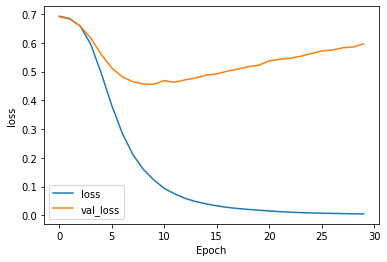

In [103]:
plot_graphs(history=history, string='loss')

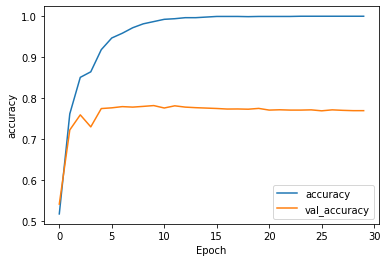

In [105]:
plot_graphs(history=history, string='accuracy')